In [1]:
1.02**60

3.2810307883654146

# <center> Regressão Linear Simples em Python </center>

## Basic ToolBox - Regressão Linear Simples

In [65]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

Em estatística ou econometria, ``regressão linear`` é uma **equação** para se **estimar a condicional** de uma variável ``y`` (**Variavel Dependente**), dados os valores de algumas outras variáveis ``x``(**Variavel Independente**). 

A ``regressão linear`` é uma técnica de análise de dados que **prevê o valor de dados desconhecidos** usando outro **valor de dados relacionado e conhecido**. Ele modela matematicamente a variável desconhecida ou ``dependente`` e a variável conhecida ou ``independente`` como uma **equação linear**.

Existem dois tipos básicos de ``regressões lineares``: **Regressão Linear Simples** e **Regressão Linear Múltipla**. Na ``Regressão Linear Simples`` estamos lidando com **uma variável de resultado** e **uma variável preditora**.  Já na ``Regressão Linear Múltipla``, estamos lidando com **uma variável de resultado** e **múltiplas variáveis preditoras**. 

## Regressão Linear Simples

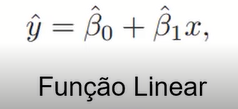

* ``y`` Valores Variavel Resultado, Previsão
* ``x`` Valores Variavel Preditoras, Explicativa, Independente
* ``B-zero`` Valor do Intercepto, Valor de **y** quando **x** é zero
* ``B-um`` Valor da Inclinação da Reta, Determina a Força da Relação entre as Variaveis, Coeficiente Angular

``Obs``: O crescimento ou decrescimento de ``y``, em relação ao crescimento ou decrescimento de ``x``, é o **coeficiente angular**. Pode se utilizar a **soma dos erros como medida de qualidade das previsões**

Uma das medidas de erro, conhecida como ``RSS``, que significa **Residual Sum of Square** ( Soma Residual de Quadrados )

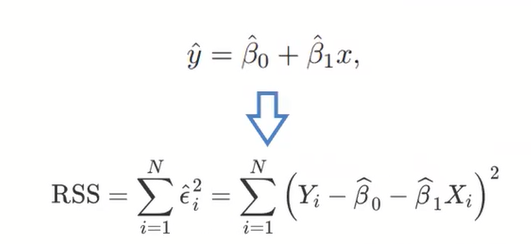
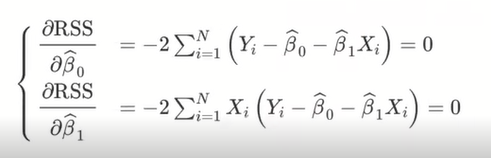

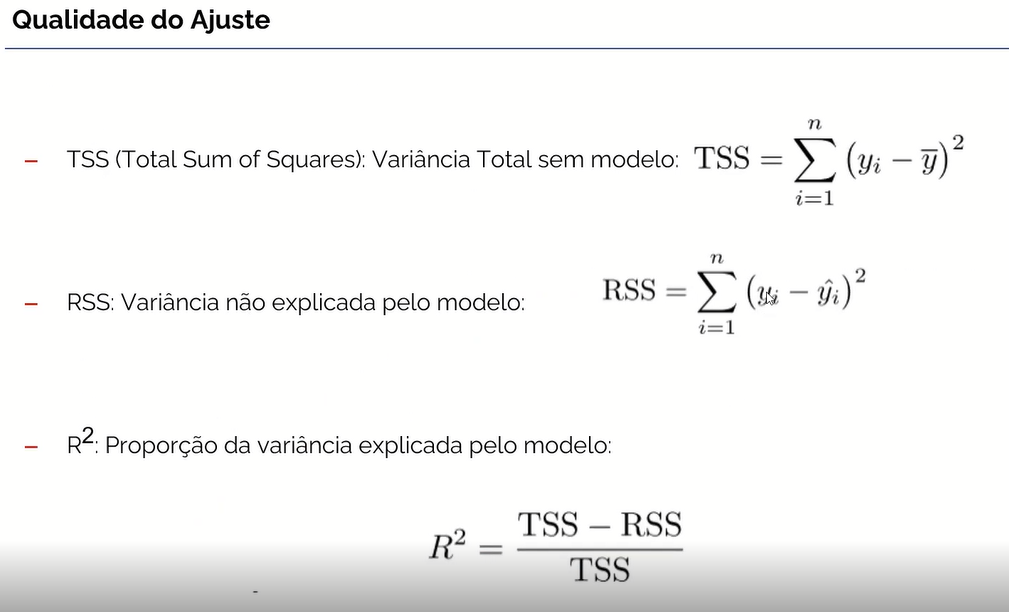

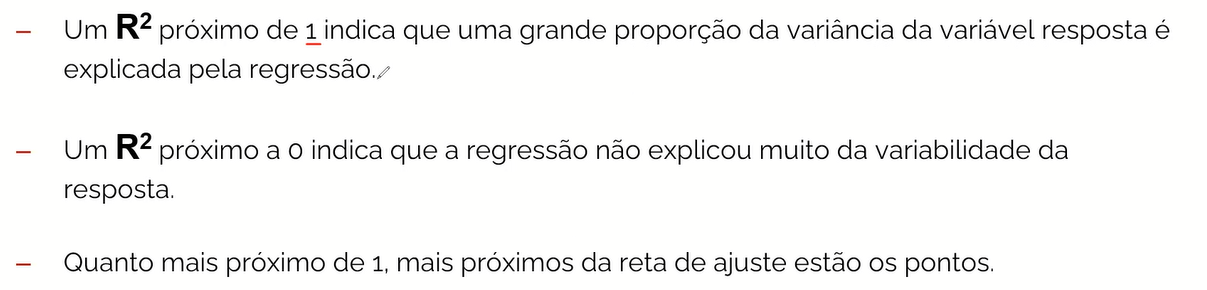

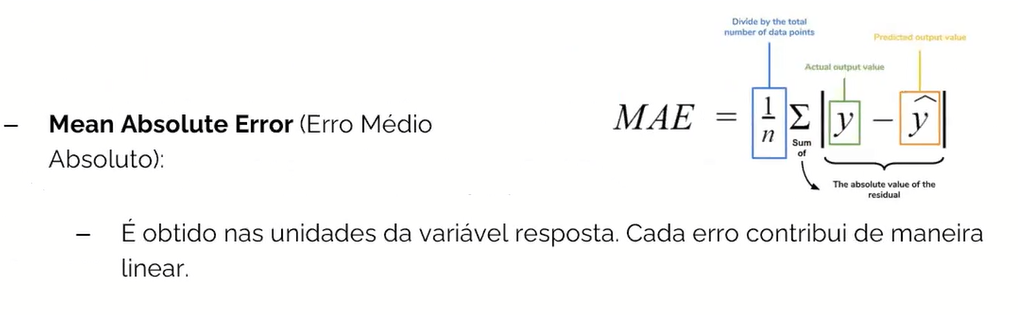

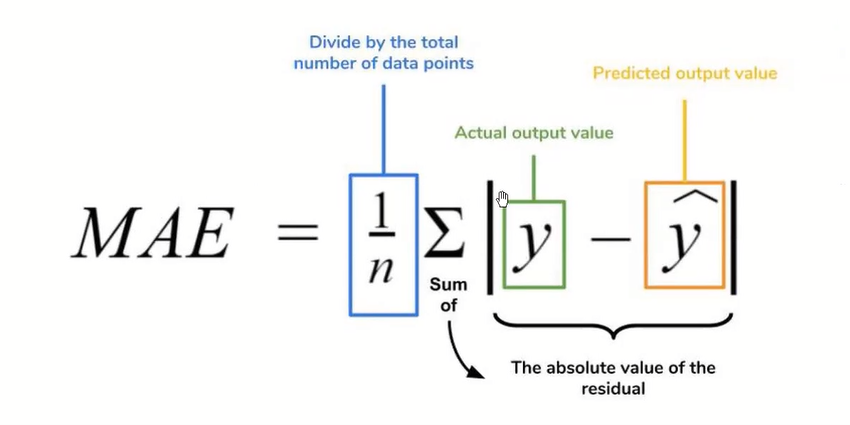

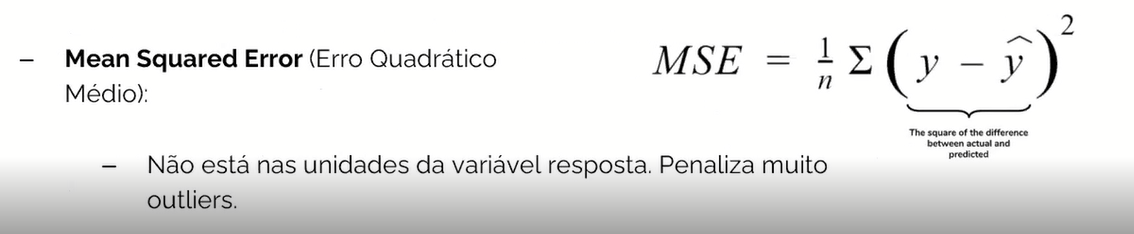

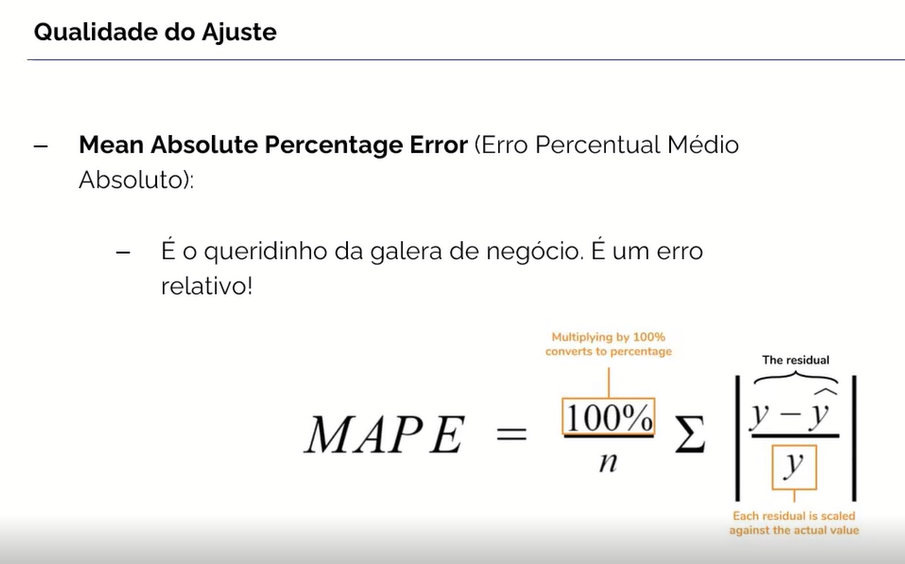

# <center> Exemplificação Guiada </center>

Iniciamos o estudo de regressões, começando com ``regressões lineares simples``. O termos **simples** é porque só utilizamos **um único preditor e linear vem da linearidade dos betas**. Vamos trabalhar com um **dataset coletado de um reservatório de água da SABESP** e tentaremos estimar a **concentração de Clorofila** no reservatório, dadas algumas condições.

## ``Carregar os Dados``

In [66]:
# Coletando os dados
df_reservatorio = pd.read_csv('clorofila.csv', sep=',')
df_reservatorio

,Condutividade,DO,pH,ORP,Profundidade,Temperatura,Turbidez,Clorofila
0,121.73,8.32,7.47,198.04,0.37,20.55,6.98,59.97
1,121.29,5.67,6.90,231.30,0.40,19.98,4.65,30.59
2,120.77,5.33,6.79,229.20,0.42,19.61,3.94,17.06
3,119.50,7.61,7.10,228.61,0.41,19.47,5.20,38.00
4,121.17,7.96,7.12,208.77,0.39,19.73,4.76,24.39
...,...,...,...,...,...,...,...,...
507,146.19,3.66,6.55,510.76,0.21,27.12,4.09,8.36
508,143.60,3.93,6.69,511.70,0.25,26.17,2.40,7.41
509,141.00,4.49,6.79,497.89,0.30,25.65,2.85,8.40
510,139.27,3.44,6.66,506.33,0.30,24.51,2.72,6.96


## ``Verificar Correlação``

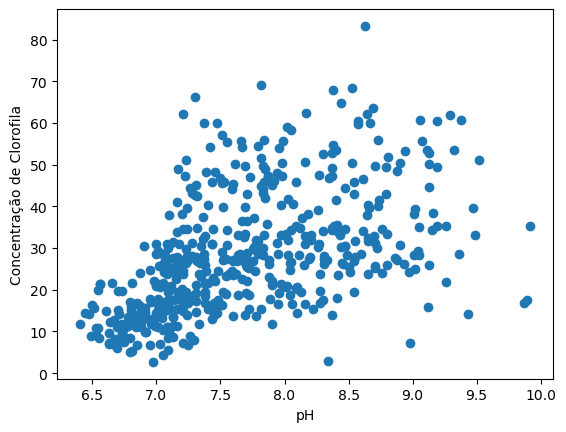

In [67]:
# plotando pH versus clorofila
plt.scatter(df_reservatorio['pH'], df_reservatorio['Clorofila'])
plt.xlabel('pH')
plt.ylabel('Concentração de Clorofila')
plt.show()

## ``Definindo as Variaveis``

In [68]:
# Definir X Variavel Independente (o preditor)
X = df_reservatorio['pH'] 

# Definir Y Variavel dependente 
Y = df_reservatorio['Clorofila']

Por default, o ``Statsmodels`` **ajusta uma reta** que começa na **origem, no ponto (0,0)**. Mas não queremos isso! Para ajustar a regressão vamos adicionar a seguinte linha de código

## ``Construindo Modelo``

In [69]:
# Adicionando a constante de Inicio da reta (Beta-zero)
X = sm.add_constant(X)

In [70]:
# Descobrindo os Betas atraves do processo de otimização OLS
modelo_linear_ph = sm.OLS(Y, X)
# Aplicando OLS (Ordinary Least Squares - Mínimos Quadrados Ordinários)

# Gerando a reta da equação
modelo_linear_ph = modelo_linear_ph.fit()
# Após gerar os betas, estimar a reta

In [71]:
# Gerar um Sumario "model.summary() " para coletar algumas informações
print_model = modelo_linear_ph.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              Clorofila   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     200.9
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           1.08e-38
Time:                        14:12:46   Log-Likelihood:                -2013.2
No. Observations:                 512   AIC:                             4030.
Df Residuals:                     510   BIC:                             4039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -52.6095      5.710     -9.214      0.0

Note que o coeficiente linear (``beta 0``) é **-52.6095** e coeficiente angular (``beta 1``) é **10.4960**

Do resumo acima, podemos ver também o ``R2`` do modelo que resultou em **28.3%**

Vamos calcular as **métricas de erro** para nosso este ajuste.

**Equação**

``Clorofila = -52,6095 + 10,4960 . pH`` <br>
             ``y = B-zero + B-um . X`` 

## ``Previsões a partir do modelo``

In [72]:
# Gerando as previsões por meio da equação encontrada pelo modelo
predictions = modelo_linear_ph.predict(X)

In [73]:
# Checando as previsões obtidas pelo modelo
print(predictions)

0      25.795602
1      19.812885
2      18.658326
3      21.912084
4      22.122004
         ...    
507    16.139288
508    17.608727
509    18.658326
510    17.293847
511    16.978967
Length: 512, dtype: float64


# <center> Métricas de Erro </center>

## ``Erro Quadratico Médio``

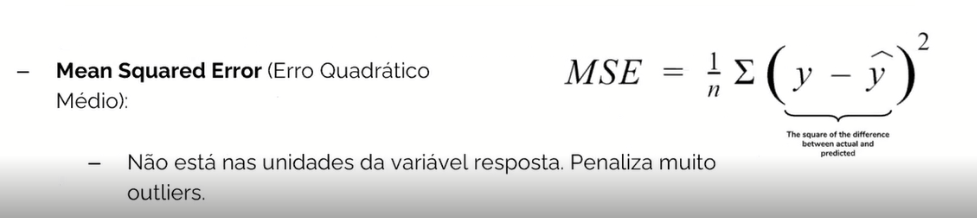

In [74]:
# Quantidade total
n = len(df_reservatorio['pH'])

# Valores Reais
y = df_reservatorio['Clorofila']

# Valor Prvisões feitas pelo modelo
yhat = predictions

# Aplicando a equação "Erro Quadratico Médio"
mse = (1 / n) * sum((y - yhat)**2)
print(mse)

152.32946488597725


## ``Erro Percentual Médio Absoluto``

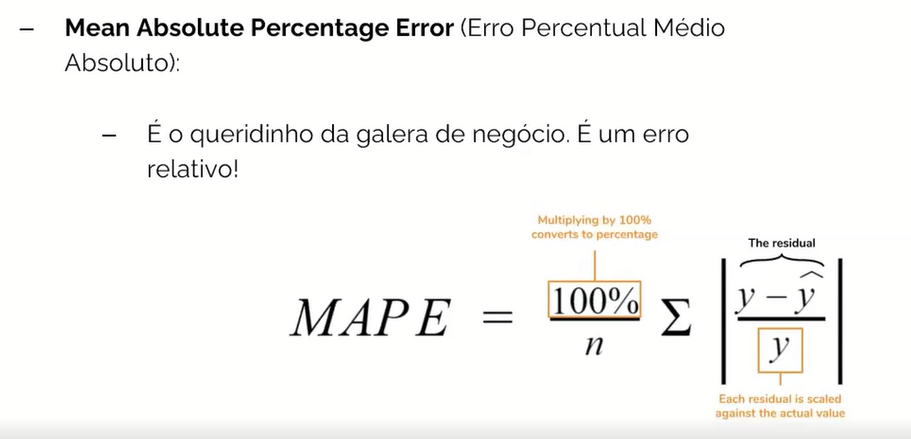

In [75]:
# Quantidade total
n = len(df_reservatorio['pH'])

# Valores Reais
y = df_reservatorio['Clorofila']

# Valor Prvisões feitas pelo modelo
yhat = predictions

# Aplicando "Erro Percentual Médio Absoluto"
mape = (100/ n) * sum(abs((y - yhat) / y))
# Este modelo gerado posui um percentual por volta de 47% de Erros
print(mape)

47.18129978751949


# ``Erro Médio Absoluto``

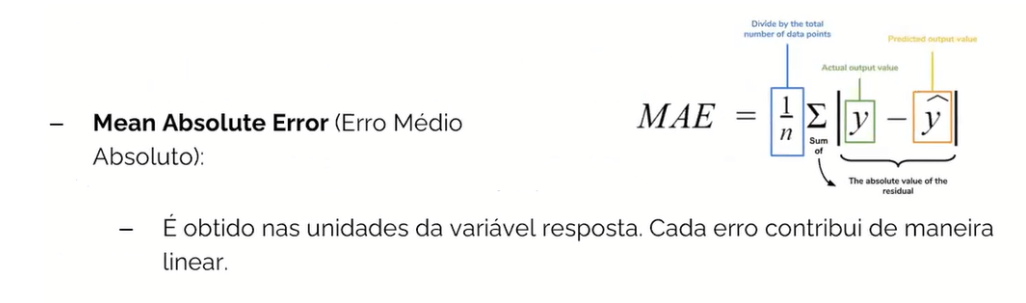

In [76]:
# Quantidade total
n = len(df_reservatorio['pH'])

# Valores Reais
y = df_reservatorio['Clorofila']

# Valor Prvisões feitas pelo modelo
yhat = predictions

# Aplicando a equação "Erro Médio Absoluto"
mae = (1 / n) * sum(abs(y - yhat))
# O resultando está na mesma gradeza da "variavel  resposta y"
print(mae)

9.610649175051638


## ``Intervalo de Confiança para á média``

Em estatística, ``intervalo de confiança`` é um tipo de estimativa por **intervalo de um parâmetro**. Um ``intervalo de confiança`` é uma **amplitude de valores**, derivados de estatísticas de amostras, que têm a **probabilidade de conter o valor** de um parâmetro populacional desconhecido

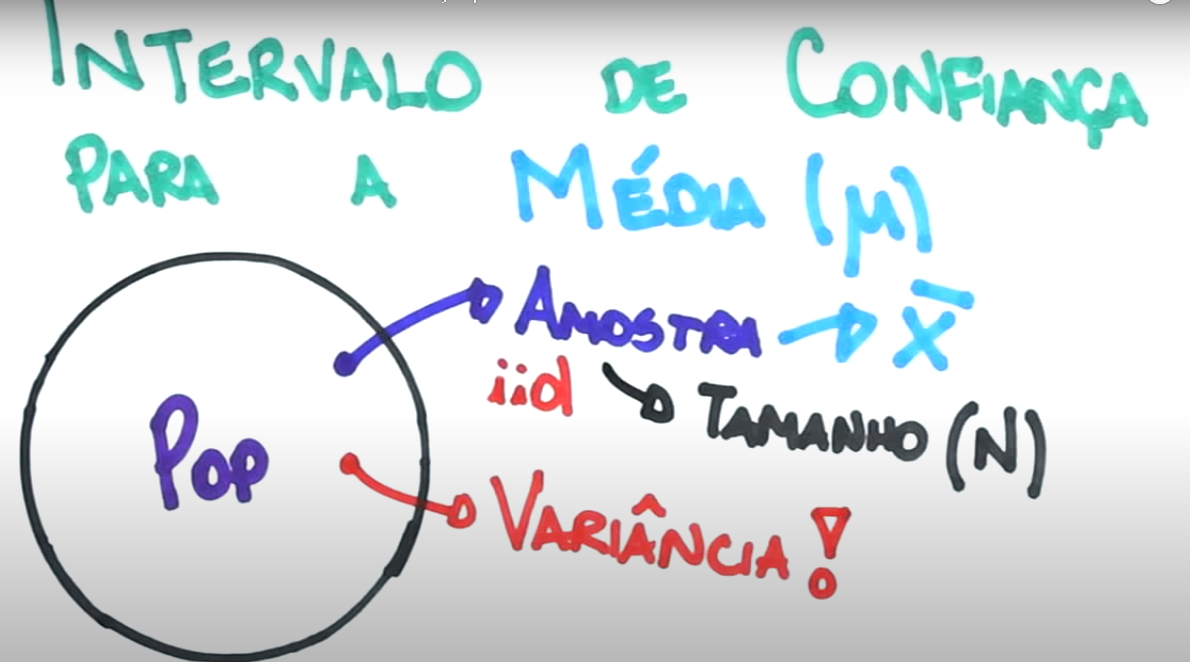

Existem **dois** casos envolvendo a ``Variancia`` 

* Quando a Variancia **Conhecida**

**Tamanho da Amostra** = ``n``<br>
**Média Amostral** = `` x̅ ``<br>
**Nivel de Confiança** = ``Valor``<br>
**Variancia** = ``σ²``



* Quando a Variancia **Desconhecida**



## statsmodels.stats.outliers_influence.``summary_table()``

* Cria uma tabela de resumo com todas as medidas de influência e outliers por meio de **Testes de atipicidades** para instâncias **RegressionResults**.


``st`` : instância SimpleTable
* tabela com resultados que podem ser impressos
<br>
</br>

``data``: ndarray
* medidas calculadas e estatísticas para a tabela
<br>
</br>

``ss2`` : lista de strings
* column_names para tabela (Nota: as linhas da tabela são observações)
<br>
</br>

``alpha``: float
* nível de significância para intervalo de confiança

In [77]:
# "summary_table"  Tabela de resumo com todas as medidas de influência e outliers
from statsmodels.stats.outliers_influence import summary_table

In [78]:
# Crie uma tabela de resumo com todas as medidas de influência e outliers
st, data, ss2 = summary_table(modelo_linear_ph, alpha=0.05)
# Fora construido um intervalo de confiança para a média de 95% de confiança ( "alpha=0.05" )

In [79]:
# Inserindo os dados
fitted_values = data[ : , 2]

# Gerando intervalo entre "low" e "up"
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
# Traçando retas para o intervalo

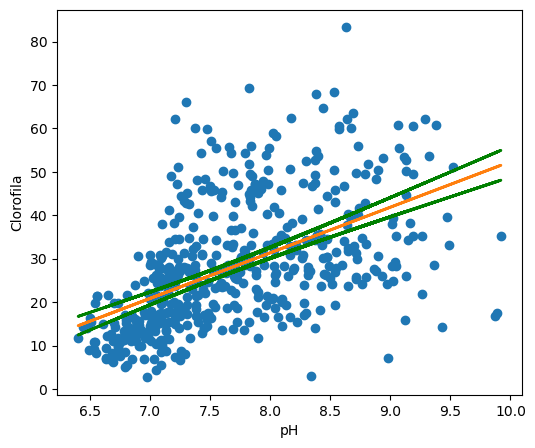

In [80]:
# Plotando um Grarfico de dispersão com o intervalo das restas
plt.figure(figsize=(6,5)) 
plt.plot(df_reservatorio['pH'], df_reservatorio['Clorofila'], 'o')
plt.plot(df_reservatorio['pH'], fitted_values, '-', lw=2)
plt.plot(df_reservatorio['pH'], predict_mean_ci_low, 'g-', lw=2)
plt.plot(df_reservatorio['pH'], predict_mean_ci_upp, 'g-', lw=2)
plt.xlabel('pH')
plt.ylabel('Clorofila')
plt.show()